**NAMA : Delvia Dianita Trianasari**<br>
**NIM  : 211351039**<br>
**KELAS : Pagi A**

#Import Dataset Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"delviadianita","key":"5a5a703509c808d5d912507ad0699a12"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 85.5MB/s]


In [4]:
!mkdir stroke-prediction-dataset
!unzip  stroke-prediction-dataset.zip -d stroke-prediction-dataset
!ls stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
  inflating: stroke-prediction-dataset/healthcare-dataset-stroke-data.csv  
healthcare-dataset-stroke-data.csv


#Import Library Yang Dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#Data Discovery

In [6]:
df = pd.read_csv("stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [7]:
# Melihat 5 Baris Pertama Dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Menghapus Kolom Id
drop_features = ["id"]
df = df.drop(drop_features, axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Mengetahui Nilai Unik/Kategori yang Tedapat Dalam Kolom 'smoking_status'
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
# Mengahapus Baris Nilai 'Unknown' Pada Kolom 'smoking_status'
df.drop(df[df["smoking_status"] == "Unknown"].index, inplace=True)
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [11]:
# Mengetahui Nilai Unik yang Tedapat Dalam Kolom 'gender'
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
# Mengahapus Baris Nilai 'Other' Pada Kolom 'gender'
df.drop(df[df["gender"] == "Other"].index, inplace=True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
# Menghitung Jumlah Nilai Null (NaN Atau Missing Values) Dalam Setiap Kolom DataFrame
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# Mengisi Nilai-Nilai yang Kosong Atau yang Hilang (Nan,Null) Dalam Kolom 'bmi'
df = df.fillna(np.mean(df['bmi']))

In [15]:
# Menghitung Kembali Jumlah Nilai Null (NaN Atau Missing Values) Dalam Setiap Kolom DataFrame
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#EDA

In [16]:
# Mengatur Warna Pallet yang Akan Digunakan Dalam Plot yang Dohasilkan
sns.set_palette("pink")

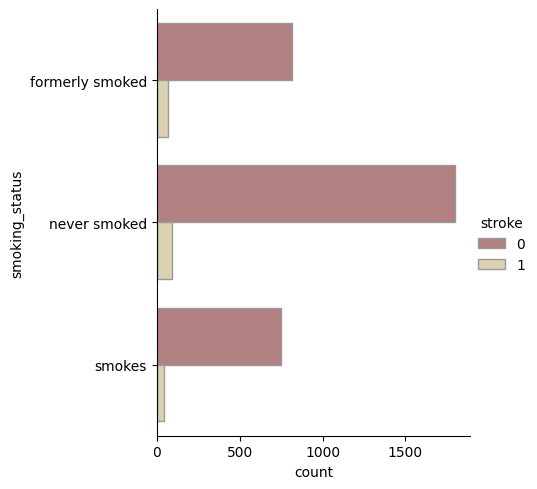

In [17]:
# Smoking to Stroke
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pink", edgecolor=".6", data=df)
plt.show()

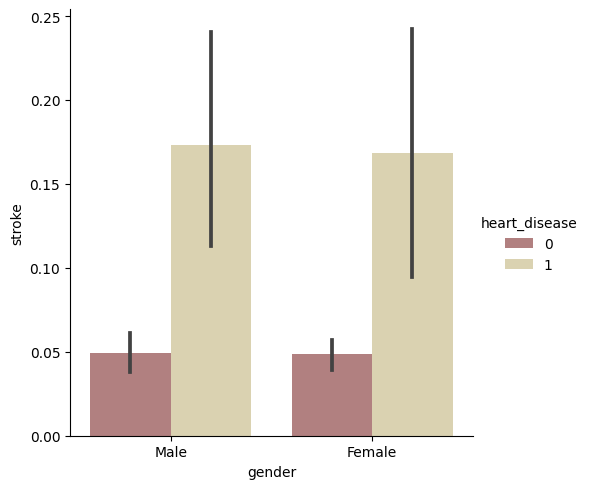

In [18]:
# Heart Disease in Gender to Stroke
sns.catplot(x="gender", y="stroke", hue="heart_disease",
            palette="pink", kind="bar", data=df)
plt.show()

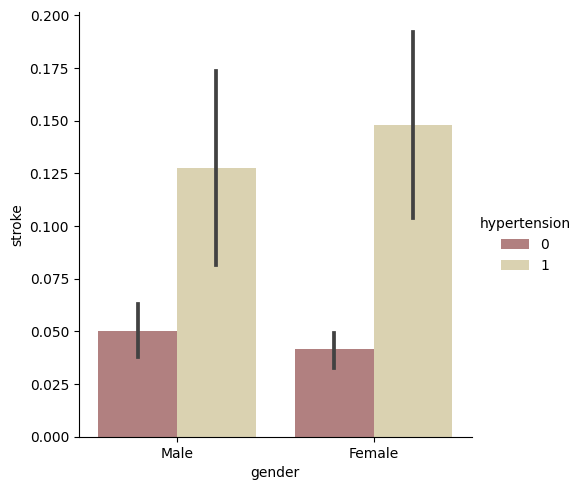

In [19]:
# Hypertension in Gender to Stroke
sns.catplot(x="gender", y="stroke", hue="hypertension",
            palette="pink", kind="bar", data=df)
plt.show()

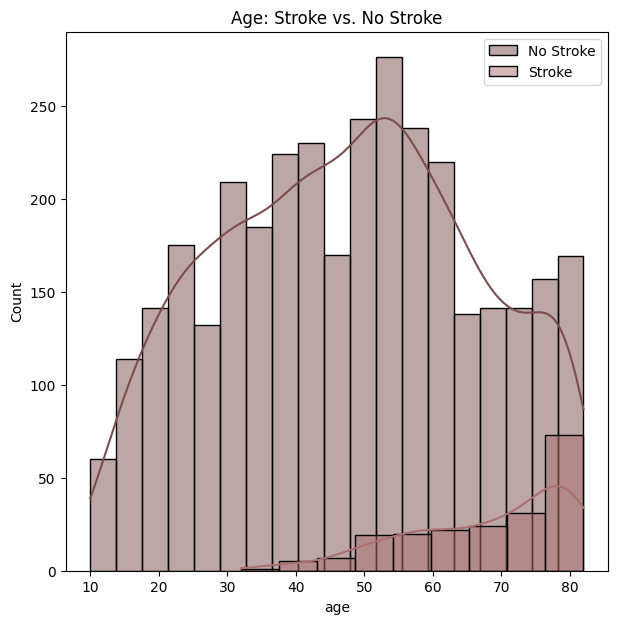

In [20]:
# Age: Stroke vs. No Stroke
plt.figure(figsize=(7,7))
sns.histplot(df[df['stroke'] == 0]['age'], kde=True, label='No Stroke')
sns.histplot(df[df['stroke'] == 1]['age'], kde=True, label='Stroke')
plt.title('Age: Stroke vs. No Stroke')
plt.legend()
plt.show()

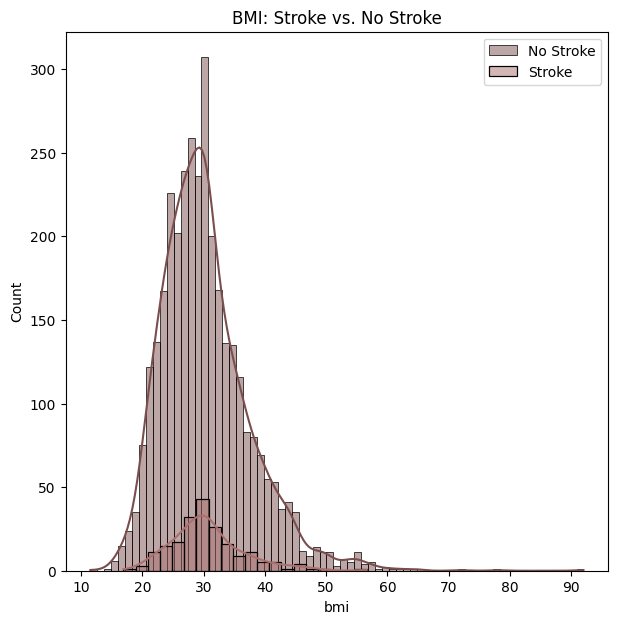

In [21]:
#  BMI: Stroke vs. No Stroke
plt.figure(figsize=(7,7))
sns.histplot(df[df['stroke'] == 0]['bmi'], kde=True, label='No Stroke')
sns.histplot(df[df['stroke'] == 1]['bmi'], kde=True, label='Stroke')
plt.title('BMI: Stroke vs. No Stroke')
plt.legend()
plt.show()

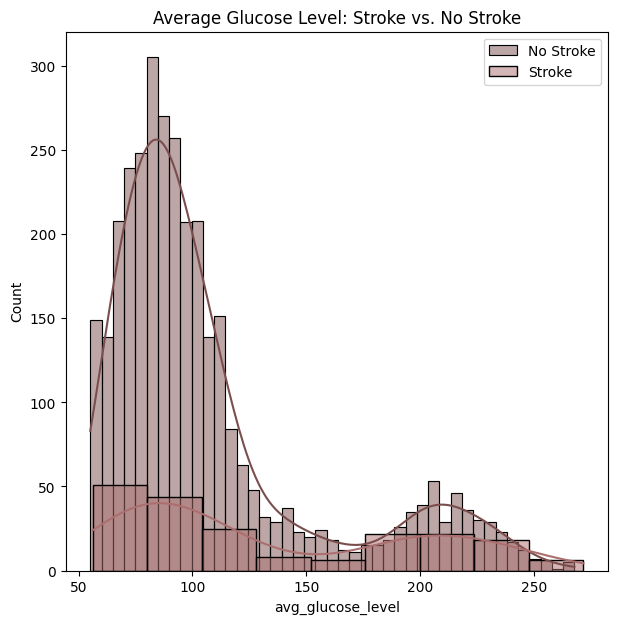

In [22]:
# Average Glucose Level: Stroke to No Stroke
plt.figure(figsize=(7, 7))
sns.histplot(df[df['stroke'] == 0]['avg_glucose_level'], kde=True, label='No Stroke')
sns.histplot(df[df['stroke'] == 1]['avg_glucose_level'], kde=True, label='Stroke')
plt.title('Average Glucose Level: Stroke vs. No Stroke')
plt.legend()
plt.show()

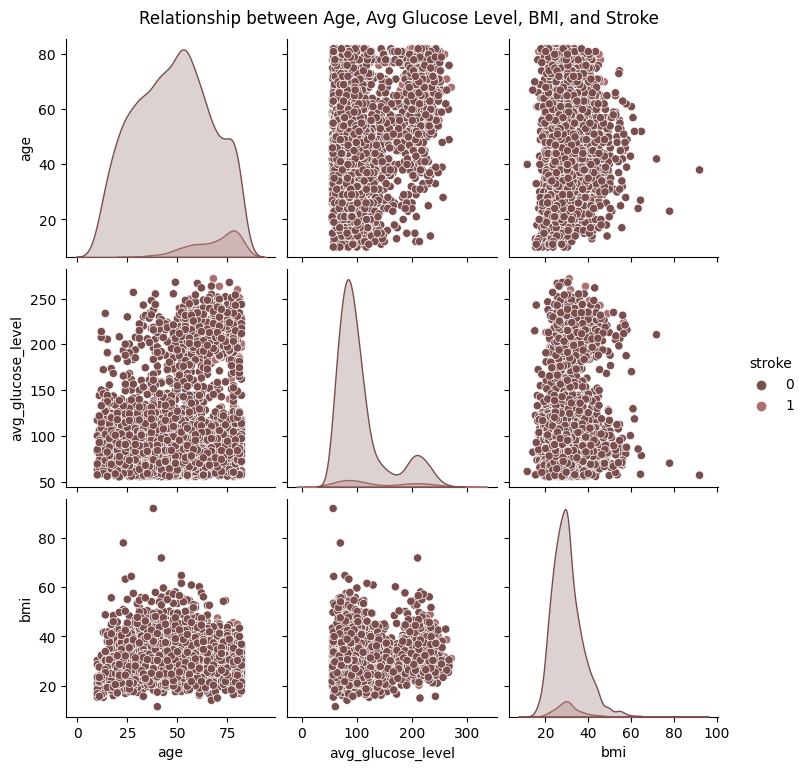

In [23]:
# Hubungan antara Usia (Age), Gula Darah Rata-rata (Avg Glucose Level), dan Indeks Massa Tubuh (BMI)
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke')
plt.suptitle('Relationship between Age, Avg Glucose Level, BMI, and Stroke', y=1.02)
plt.show()


<ipython-input-24-129e42b0734f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


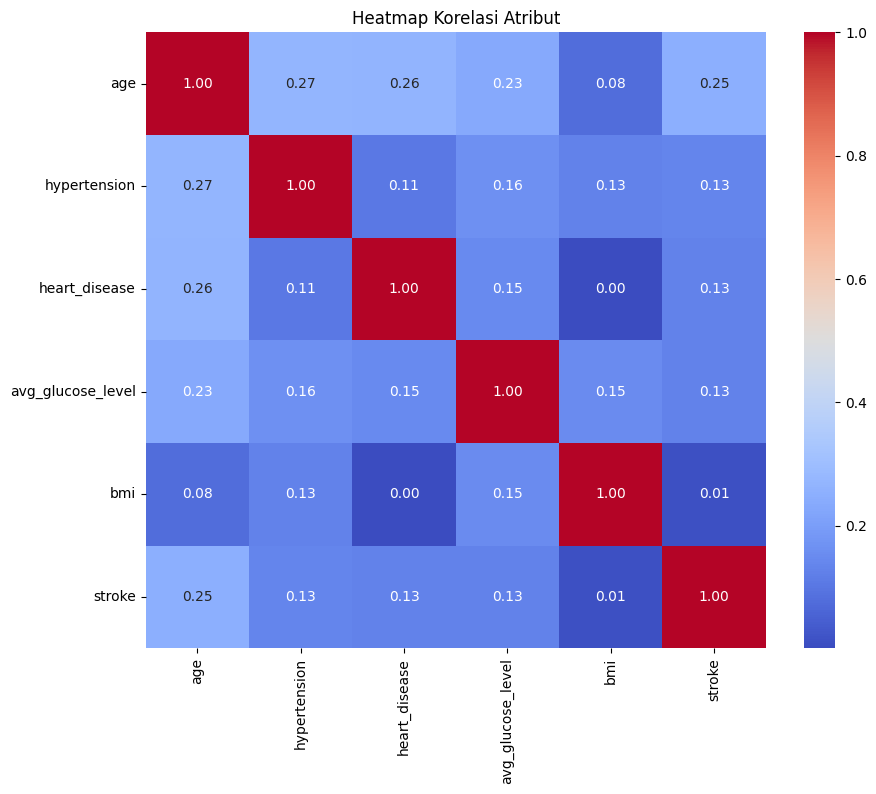

In [24]:
# Heatmap untuk Korelasi antar Atribut
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Atribut')
plt.show()

#Data Preparation

In [25]:
df = pd.get_dummies(df,
                    columns=['work_type', 'smoking_status'],
                    prefix=['work', 'smoke'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.60000,1,0,0,1,0,0,1,0,0
1,Female,61.0,0,0,Yes,Rural,202.21,30.29235,1,0,0,0,1,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.92,32.50000,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Urban,171.23,34.40000,1,0,0,1,0,0,0,0,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.00000,1,0,0,0,1,0,0,1,0


In [26]:
# Mengubah Kolom-Kolom Kategorikal Dalam DataFrame Menjadi Biner
df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1, 0)
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df['Residence_type'] = np.where(df['Residence_type'] == 'Urban', 1, 0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,30.29235,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,1,0


In [27]:
#  Feature Encoding
numerical = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df[numerical] = df[numerical].round(2)

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1,0.96,0,1,1,1,2.48,0.88,1,0,0,1,0,0,1,0,0
1,0,0.64,0,0,1,0,1.93,0.00,1,0,0,0,1,0,0,1,0
2,1,1.65,0,1,1,0,-0.06,0.31,1,0,0,1,0,0,0,1,0
3,0,0.01,0,0,1,1,1.29,0.57,1,0,0,1,0,0,0,0,1
4,0,1.60,1,0,1,0,1.35,-0.88,1,0,0,0,1,0,0,1,0


In [29]:
df.to_csv('stroke-dataset.csv',index=False)

In [30]:
# Menghapus Baris DataFrame yang Mengandung Nilai-Nilai yang Hilang(NaN)
df.dropna(inplace=True)

In [31]:
# Pemilihan Fitur/Kolom Pada DataFrame yang Disimpan Dalam Variable
selected_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                     'Residence_type', 'avg_glucose_level', 'bmi','stroke']
df = df[selected_features]

In [32]:
# Mempersiapkan Dataset Untuk Pembelajaran Mesin Dengan MemisahkanFitur(x) dari target(y) yang Ingin Diprediksi
X = df.drop('stroke', axis=1)
y = df['stroke']

In [33]:
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,1,0.96,0,1,1,1,2.48,0.88
1,0,0.64,0,0,1,0,1.93,0.00
2,1,1.65,0,1,1,0,-0.06,0.31
3,0,0.01,0,0,1,1,1.29,0.57
4,0,1.60,1,0,1,0,1.35,-0.88
...,...,...,...,...,...,...,...,...
5102,0,0.43,0,0,1,0,-0.64,-1.20
5105,0,1.65,1,0,1,1,-0.52,0.00
5106,0,1.70,0,0,1,1,0.34,1.36
5107,0,-0.73,0,0,1,0,-0.54,0.04


In [34]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5102    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 3565, dtype: int64

#Modeling

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [37]:
score = model.score(X_test, y_test)
print('Akurasi Model K-Nearest Neighbor (KNN) =', score,"%")

Akurasi Model K-Nearest Neighbor (KNN) = 0.9261682242990654 %


In [38]:
# Mencari nilai k terbaik
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

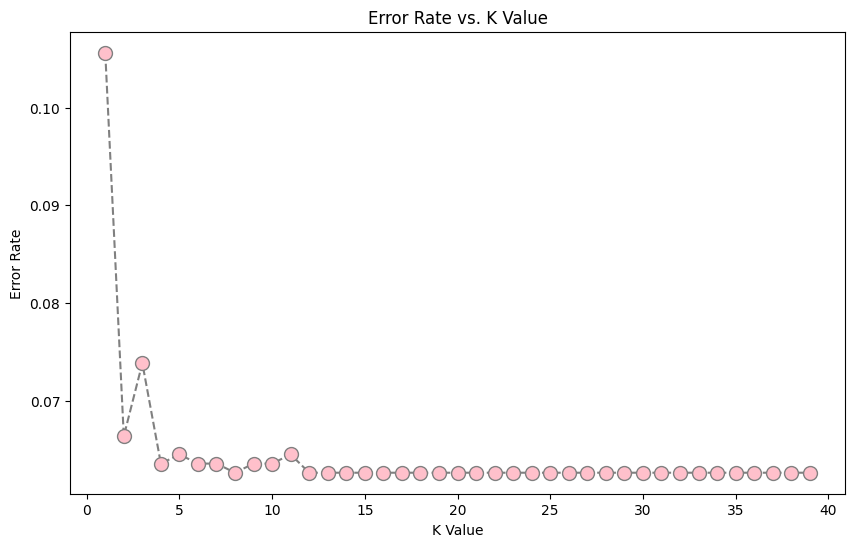

In [39]:
# Plotting nilai k terhadap error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [40]:
# Menggunakan nilai k terbaik untuk model KNN
best_k = error_rate.index(min(error_rate)) + 1
print(f"Best K: {best_k}")

Best K: 8


In [41]:
# Membuat model KNN dengan nilai k terbaik
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [42]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1003    0]
 [  67    0]]


In [43]:
#Memprediksi Stroke Menggunakan Model KNN
input_data = np.array([[0,0.64,0,0,1,0,1.93,0.00]])

prediction = knn.predict(input_data)
prediction_label = 'No' if prediction == 0 else 'Yes'
print('Prediction Stroke :', prediction)

Prediction Stroke : [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#Visualisasi Hasil Modeling

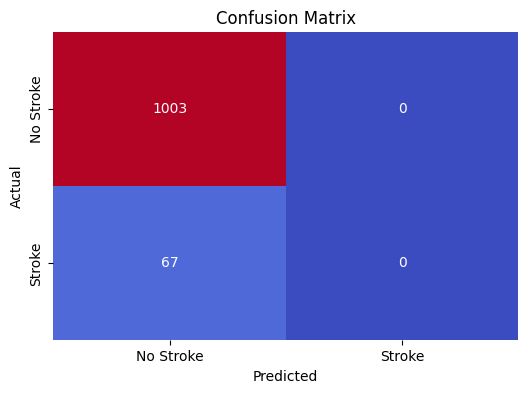

In [44]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'], fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

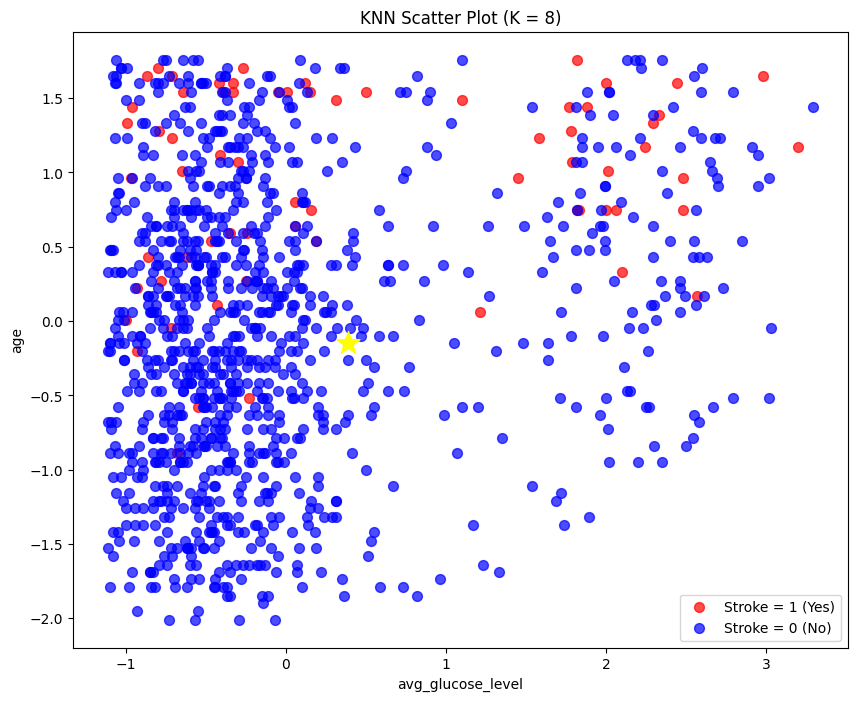

In [45]:
def knn_visualization(k, X_test, y_test, y_pred):
    plt.figure(figsize=(10, 8))

    # Menyiapkan nilai prediksi yang benar dan salah
    correct_pred = (y_pred == y_test)
    wrong_pred = (y_pred != y_test)

    # Plot scatter untuk kelas positif (stroke = 1)
    plt.scatter(X_test[y_test == 1]['avg_glucose_level'], X_test[y_test == 1]['age'], color='red', label='Stroke = 1 (Yes)', alpha=0.7, s=50)

    # Plot scatter untuk kelas negatif (stroke = 0)
    plt.scatter(X_test[y_test == 0]['avg_glucose_level'], X_test[y_test == 0]['age'], color='blue', label='Stroke = 0 (No)', alpha=0.7, s=50)

    plt.xlabel('avg_glucose_level')
    plt.ylabel('age')
    plt.title(f'KNN Scatter Plot (K = {k})')
    plt.legend()
    plt.scatter(x=X_test.iloc[0]['avg_glucose_level'], y=X_test.iloc[0]['age'], color='yellow', s=300, marker='*')  # Contoh bintang di titik pertama dari X_test

    plt.show()

# Menggunakan fungsi visualisasi KNN dengan nilai k = 8 dan menambahkan bintang di titik pertama dari X_test
k_value = 8
knn_visualization(k_value, X_test, y_test, y_pred)


#Simpan Model (Pickle)

In [46]:
import pickle
# Menyimpan model KNN dalam file pickle
filename= 'Stroke_Predict.sav'
pickle.dump(knn,open(filename, 'wb'))